### Learning Objectives

- Matplotlib basics syntax;
- Customizing a figure;
- Understanding the `figure`, `axes` and how to create `subplots`;
- Plotting using matplotlib wrappers (pandas, xarray, etc).

![](https://holoviz.org/assets/landscape_hv_nx.png)

### Basic matplotlib

![](data/mpl_anatomy.png)

In [1]:
# Try qt5 or notebook later.
# You'll have to restart the kernel first!
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import matplotlib


matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

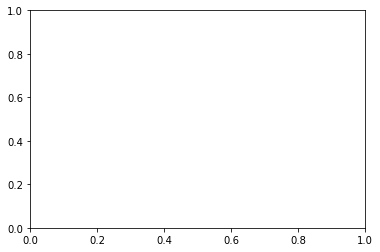

In [4]:
ax = plt.axes()

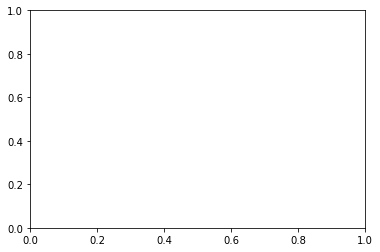

In [5]:
fig, ax = plt.subplots()

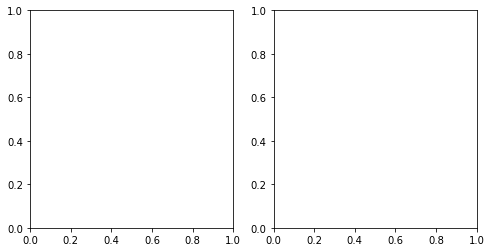

In [6]:
fig, ax = plt.subplots(
    figsize=(8, 4),
    ncols=2,
)

In [7]:
import pandas as pd


url = ("https://raw.githubusercontent.com/ocefpaf/"
       "2018-Jun-SWC-Floripa/master/data")

fname = "dados_pirata.csv"
df = pd.read_csv(
    f"{url}/{fname}",
    index_col='datahora',
    parse_dates=True,
    na_values=-99999,
)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns = ['{0:0>3}'.format(col.split('_')[1]) for
              col in df.columns]

df.sort_index(axis=1, inplace=True)
df.head(10)

,001,005,010,013,020,040,060,080,100,120,140,180,300,500
datahora,,,,,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,NaN,NaN,NaN,25.17,25.17,25.19,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00+00:00,25.19,NaN,NaN,NaN,25.18,25.18,25.21,25.18,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00+00:00,25.26,NaN,NaN,NaN,25.24,25.22,25.20,25.16,25.13,24.74,23.63,20.43,12.36,6.87
2005-08-27 12:00:00+00:00,25.23,NaN,NaN,NaN,25.19,25.19,25.14,25.08,25.04,24.77,23.74,20.10,12.23,6.86
2005-08-28 12:00:00+00:00,25.25,NaN,NaN,NaN,25.21,25.11,25.04,24.99,24.90,24.78,23.81,20.21,12.48,6.79
2005-08-29 12:00:00+00:00,25.33,NaN,NaN,NaN,25.27,25.12,25.03,24.94,24.89,24.43,23.51,19.93,12.29,6.87
2005-08-30 12:00:00+00:00,25.49,NaN,NaN,NaN,25.39,25.33,25.30,25.03,24.84,23.88,23.15,19.93,12.42,6.79
2005-08-31 12:00:00+00:00,25.47,NaN,NaN,NaN,25.43,25.44,25.39,25.16,24.91,23.92,23.22,20.01,12.47,6.88
2005-09-01 12:00:00+00:00,25.47,NaN,NaN,NaN,25.44,25.44,25.46,25.16,24.95,24.60,23.71,20.26,12.38,6.89


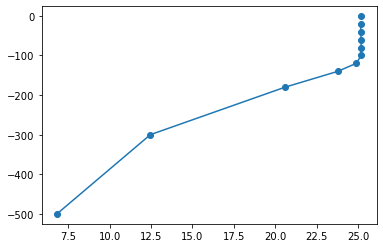

In [9]:
fig, ax = plt.subplots()

z = df.columns.astype(float)

ax.plot(df.iloc[0, :], -z, "-o");

## What are we plotting? Let's label!

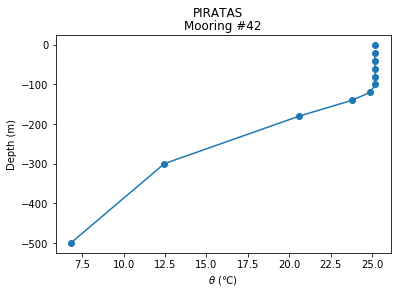

In [10]:
fig, ax = plt.subplots()

ax.plot(df.iloc[0, :], -z, "-o")

fig.suptitle("PIRATAS")
ax.set_title("Mooring #42")
ax.set_xlabel(r"$\theta$ (℃)")
ax.set_ylabel("Depth (m)");

### We can customize the `ticks`...

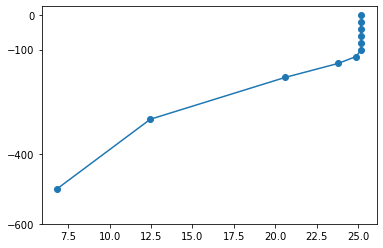

In [11]:
fig, ax = plt.subplots()

ax.plot(df.iloc[0, :], -z, "-o")
ax.set_yticks([0, -100, -400, -600]);

###  ... and the `yticklabels()`.

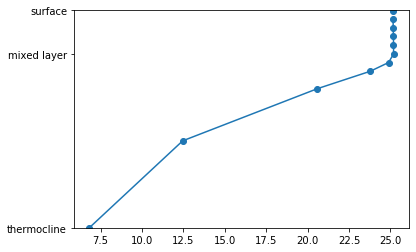

In [12]:
fig, ax = plt.subplots()

ax.plot(df.iloc[0, :], z, "-o")
ax.invert_yaxis()
ax.set_yticks([0, 100, 500]);
ax.set_yticklabels(["surface", "mixed layer", "thermocline"]);

Exercise: We used `df.iloc[0, :]` to  plot the first time index versus the all depths.
Create for a time series (all time indexes) for a single depth and customize it.

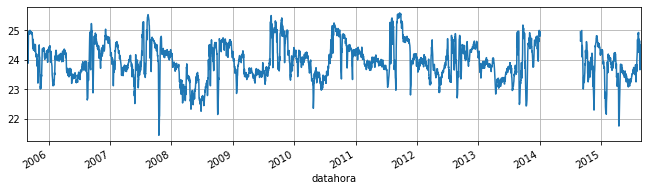

In [13]:
# %load 00-mpl-basics-00-sol.py
fig, ax = plt.subplots(figsize=(11, 2.75))

df["120"].plot(ax=ax);
ax.grid(True);


### Plotting directly from pandas

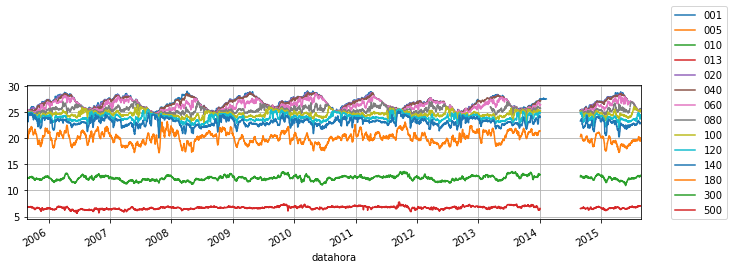

In [14]:
ax = df.plot(figsize=(11, 2.75))
ax.legend(loc=(1.05, 0))
ax.grid(True);

### This allow for a compact processing/plotting code

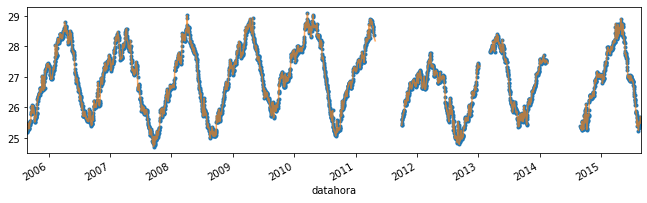

In [15]:
plot = {"marker": ".", "linestyle": "none", "figsize": (11, 3)}
interp = {"method": "time", "limit": 10}

df["001"].plot(**plot);
df["001"].interpolate(**interp).plot(alpha=0.65);

Exercise: check the `plt.subplots` documentation and create a subplot with two rows and 1 column. Plot different depths in the rows.

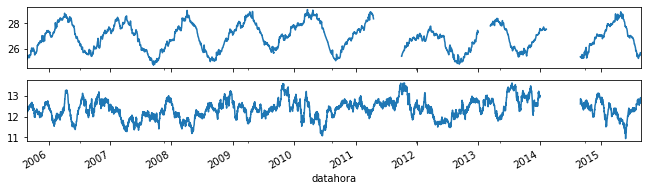

In [16]:
# %load 00-mpl-basics-01-sol.py
fig, (ax0, ax1) = plt.subplots(
    figsize=(11, 2.75),
    nrows=2,
    sharex=True,
)

df["001"].plot(ax=ax0)
df["300"].plot(ax=ax1);


Exercise: load the file `15t30717.3f1` from the `url` below and plot the `u` and `v` time-series.

url = "https://raw.githubusercontent.com/ocefpaf/2018-Jun-SWC-Floripa/master/data/15t30717.3f1"

Note that this dataset is not labeled! (Welcome to the messy world of bad/absent metadata.)

Use `names = ["j", "u", "v", "temp", "sal", "y", "mn", "d", "h", "mi"]` in pandas to identify the columns.

bonus points: filter the tidal signal using pandas `rolling` method.

In [17]:
# %load 00-mpl-basics-02-sol.py
from datetime import datetime

fname = "15t30717.3f1"
parse = lambda x: datetime.strptime(x, "%Y %m %d %H %M")
names = ["j", "u", "v", "temp", "sal", "y", "mn", "d", "h", "mi"]

df = pd.read_csv(
    f"{url}/{fname}",
    delim_whitespace=True,
    names=names,
    date_parser=parse,
    parse_dates = [["y", "mn", "d", "h", "mi"]],
    index_col="y_mn_d_h_mi",
)

df.head()


,j,u,v,temp,sal
y_mn_d_h_mi,,,,,
1993-07-18 03:00:00,564.1250,11.7,-1.3,28.3,29.2
1993-07-18 04:00:00,564.1667,12.3,-4.5,28.1,29.4
1993-07-18 05:00:00,564.2083,9.6,-5.3,27.6,31.0
1993-07-18 06:00:00,564.2500,7.6,-2.3,27.2,32.4
1993-07-18 07:00:00,564.2917,10.6,-2.0,27.2,32.5


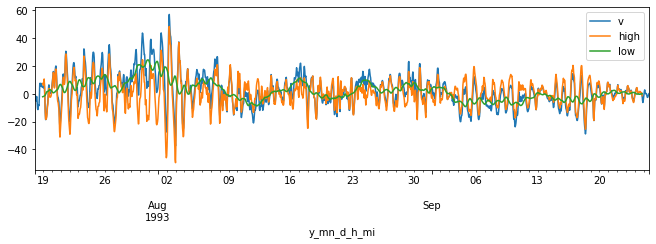

In [18]:
# %load 00-mpl-basics-03-sol.py
df = df.resample(rule="1H").mean()

df["low"] = df["v"].rolling(window=40, center=True).mean()
df["high"] = df["v"] - df["low"]
df[["v", "high", "low"]].plot(figsize=(11, 3));


### Plotting slices and surfaces

For more examples see <https://ioos.github.io/notebooks_demos/notebooks/2019-03-08-grids-temperature/>.

In [19]:
import xarray as xr


url = ("http://thredds.secoora.org/thredds/dodsC/SECOORA_NCSU_CNAPS.nc")
ds = xr.open_dataset(url)

In [20]:
temp = ds.filter_by_attrs(
    standard_name="sea_water_potential_temperature"
)
temp.info()

xarray.Dataset {
dimensions:
	eta_rho = 482 ;
	s_rho = 36 ;
	time = 7995 ;
	xi_rho = 402 ;

variables:
	float32 temp(time, s_rho, eta_rho, xi_rho) ;
		temp:standard_name = sea_water_potential_temperature ;
		temp:field = temperature, scalar, series ;
		temp:units = degree_Celsius ;
		temp:time = time ;
		temp:long_name = Potential Temperature ;
		temp:_ChunkSizes = [  1  36 482 402] ;
	float64 lat_rho(eta_rho, xi_rho) ;
		lat_rho:units = degrees_north ;
		lat_rho:long_name = latitude of RHO-points ;
		lat_rho:standard_name = latitude ;
		lat_rho:field = lat_rho, scalar ;
		lat_rho:_CoordinateAxisType = Lat ;
		lat_rho:_ChunkSizes = [482 402] ;
	float64 lon_rho(eta_rho, xi_rho) ;
		lon_rho:units = degrees_east ;
		lon_rho:long_name = longitude of RHO-points ;
		lon_rho:standard_name = longitude ;
		lon_rho:field = lon_rho, scalar ;
		lon_rho:_CoordinateAxisType = Lon ;
		lon_rho:_ChunkSizes = [482 402] ;
	datetime64[ns] time(time) ;
		time:long_name = Forecast time for ForecastModelRunC

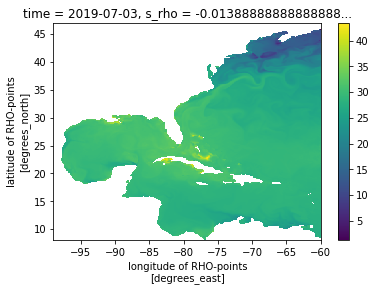

In [21]:
surface = temp.isel(time=-1, s_rho=-1).to_array()

surface.plot(
    x="lon_rho",
    y="lat_rho",
);

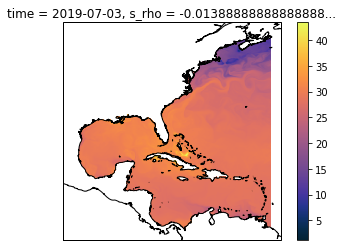

In [22]:
import cartopy.crs as ccrs
from palettable.cmocean.sequential import Thermal_20

cmap = Thermal_20.mpl_colormap

ax = plt.axes(projection=ccrs.PlateCarree())
surface.plot(ax=ax,
             x="lon_rho",
             y="lat_rho",
             cmap=cmap)

ax.coastlines(resolution="10m");

Exercise: change the `isel` call we did above,

```python
temp.isel(time=-1, s_rho=-1).to_array()
```

and create a time-series plot at a certain point and another slice at any given depth. Was it easy to figure out the point and the depth?

Challenge: perform a temperature slice at a given depth (250 m).

In [ ]:
# %load 00-mpl-basics-04-sol.py
series = temp.isel(
    s_rho=-1,
    eta_rho=42,
    xi_rho=42,
).to_array()

series.plot();


In [ ]:
# %load 00-mpl-basics-05-sol.py
bottom = temp.isel(
    time=-1,
    s_rho=0,
).to_array()

surface.plot(
    x="lon_rho",
    y="lat_rho",
);


In [ ]:
# %load 00-mpl-basics-06-sol.py
import iris
import matplotlib.pyplot as plt

import numpy.ma as ma
import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from ciso import zslice


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.coastlines('50m')
    return fig, ax



cube = iris.load_cube(url, "sea_water_potential_temperature")
cube = cube[-1, ...]  # last time step

lon = cube.coord(axis='X').points
lat = cube.coord(axis='Y').points
p = cube.coord("sea_surface_height_above_reference_ellipsoid").points
p0 = -250
isoslice = zslice(cube.data, p, p0)

fig, ax = make_map()
ax.set_extent(
    [lon.min(), lon.max(),
     lat.min(), lat.max()]
)

cs = ax.pcolormesh(
    lon, lat,
    ma.masked_invalid(isoslice),
)

kw = {"shrink": 0.65, "orientation": "horizontal", "extend": "both"}
cbar = fig.colorbar(cs, **kw)


Exercise: choose a model from  https://eds.ioos.us, load with `xarray`, and plot a surface layer slice of any property.

### Vertical sections

In [26]:
url = ("http://eds.ioos.us/eds_thredds/dodsC/"
       "EDS/HYCOM_3D_R1/hycom_3d_r1_2019082600.nc")

ds = xr.open_dataset(url, decode_times=False)
section = ds["salinity"].isel(time=0)
section = section.sel(lon=302, method='nearest')

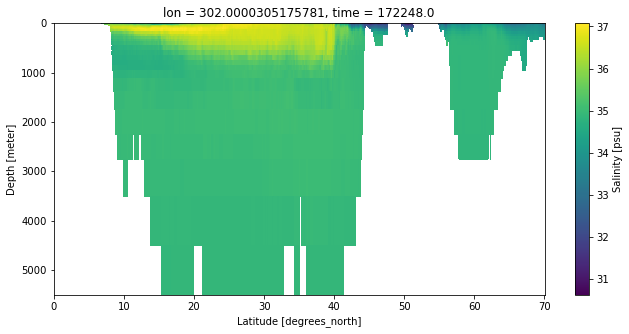

In [27]:
fig, ax = plt.subplots(figsize=(11, 5))
cs = section.plot(ax=ax)
ax.invert_yaxis()

If you need more complex sections, like comparing the path of a glider with a model check [this notebook](https://nbviewer.jupyter.org/gist/ocefpaf/b952cb560f4a508b964825b1b53c78da). You'll notice that it does not use `xarray`, the main reason is the lack of support for vertical coordinates. [More on that on here](https://gist.github.com/ocefpaf/18e8fe29005c148fe0e3).

### Want to know how to perform vertical slices on numerical models?

![](https://media.giphy.com/media/WUGNg3FuhiywU/giphy.gif)

### This is only be beginning!

There are many tutorials on matplotlib out there. Here are a few resouces:

- https://github.com/matplotlib/GettingStarted
- https://matplotlib.org/gallery.html
- https://github.com/rougier/matplotlib-cheatsheet

In [28]:
import hvplot.pandas


df[["v", "high", "low"]].hvplot()

:NdOverlay   [Variable]
   :Curve   [y_mn_d_h_mi]   (value)